In [1]:
PANDAS_PLOTTING_DISABLED=False

In [2]:
import sys
print(sys.prefix != sys.base_prefix) # true if in venv
sys.version # 3.11.6

True


'3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]'

In [3]:
# import matplotlib.pyplot as plt

Import pandas library as pd for brevity.

In [4]:
import pandas as pd
import numpy as np

def dummy(*args,**kwargs):
  # print(args)
  return
if PANDAS_PLOTTING_DISABLED:
  pd.DataFrame.plot=dummy
# dataGas01=pd.read_csv('stratos_data/desfa_stratos_hourly_gas_flow_enum0.csv',delimiter=',',parse_dates=['refRealDateTimeFrom_inZone'])
# dataGas0=pd.read_csv('stratos_data/desfa_stratos_hourly_gas_flow_enum0.csv',delimiter=',',parse_dates=['refRealDateTimeFrom_inZone'],index_col=['refRealDateTimeFrom_inZone'])
# pd.date_range(start = '2018-08-01 04:00:00', end = '2022-09-15 09:00:00' ,freq='h').difference(dataGas0.index).size

# Data preprocessing

## Find empty timestamps

In [5]:
def missing_daily_values(df: pd.DataFrame, start='2018-08-01 04:00:00',end='2022-09-15 09:00:00'):
    """index must be a DateTimeIndex for this function to make sense"""
    missingDatetimes = pd.date_range(start=start, end=end, freq='h').difference(df.index)
    missingDf = pd.DataFrame(index=missingDatetimes, data=np.ones(missingDatetimes.size))
    missingDfHours = missingDf.resample(rule='d').sum(min_count=1)
    missingDfHours.dropna(inplace=True)
    return missingDfHours

def missing_hours_series(df: pd.DataFrame, start='2018-08-01 04:00:00',end='2022-09-15 09:00:00'):
    """index must be a DateTimeIndex for this function to make sense"""
    missingDatetimes = pd.date_range(start=start, end=end, freq='h').difference(df.index)
    return missingDatetimes.to_series()

def contiguous_hours(s: pd.Series):
    """series s must be of TimeStamp type (hourly data) for this function to make sense"""
    threshold = pd.Timedelta(hours=1)

    # Calculate the differences between consecutive datetime values
    diffs = s.diff()

    # Identify groups of contiguous datetime values
    groups = (diffs > threshold).cumsum()

    # Aggregate contiguous groups
    result = s.groupby(groups).agg(['min', 'max']).reset_index(drop=True)
    result['time']=result['max']-result['min']
    result.rename(columns={"min": "From", "max": "To"},inplace=True)
    return result


### Gas flows

In [6]:
df_gas0=pd.read_csv('stratos_data/desfa_stratos_hourly_gas_flow_enum0.csv',delimiter=',',parse_dates=['refRealDateTimeFrom_inZone'],index_col=['refRealDateTimeFrom_inZone'])
# missing_df_day.index=missing_df_day.index.astype(dtype='string')
# missing_df_day.plot(kind='barh')
missing_hours0=missing_daily_values(df=df_gas0,start=df_gas0.index.min(),end=df_gas0.index.max())
# missing_hours.shift(freq='d')
# addPreviousDay=missing_hours.shift(freq='d').add(missing_hours,fill_value=0)
# test= addPreviousDay#[addPreviousDay[0] == 48]
# test.groupby([0]).cumcount().to_frame().join(addPreviousDay,rsuffix='t')
df_gas1=pd.read_csv('stratos_data/desfa_stratos_hourly_gas_flow_enum1.csv',delimiter=',',parse_dates=['refRealDateTimeFrom_inZone'],index_col=['refRealDateTimeFrom_inZone'])
missing_hours1=missing_daily_values(df=df_gas1)
should_plot2=not missing_hours0.equals(missing_hours1)

Εξαγωγή συμπερασμάτων για gas flows

Δεδομένα από 2018-08-01 04:00:00 ως 2022-09-15 09:00:00
Δεδομένα από 2018-08-01 04:00:00 ως 2022-09-15 09:00:00


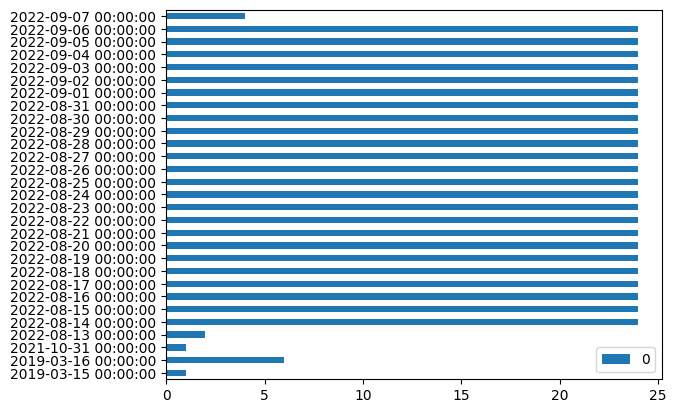

In [7]:
print('Δεδομένα από',df_gas0.index.min(),'ως',df_gas0.index.max())
print('Δεδομένα από',df_gas1.index.min(),'ως',df_gas1.index.max())
missing_hours0.plot(kind='barh')
if should_plot2:
  missing_hours1.plot(kind='barh')

### Solar

In [8]:
df_solar=pd.read_csv('stratos_data/entsoe_stratos_solar.csv',delimiter=',',parse_dates=['DateTime'],index_col=['DateTime'])
df_solar['2019-06-05':'2019-06']
# (df_solar-200).resample(rule='d').sum()['2019-06':'2019-06']#.plot()


,AggregatedGenerationForecast
DateTime,
2019-06-22 21:00:00,0.0
2019-06-22 22:00:00,0.0
2019-06-22 23:00:00,0.0
2019-06-23 00:00:00,0.0
2019-06-23 01:00:00,0.0
...,...
2019-06-30 19:00:00,0.0
2019-06-30 20:00:00,0.0
2019-06-30 21:00:00,0.0


        from         to       t
0 2019-05-01 2019-05-02  1 days
1 2019-05-29 2019-05-31  2 days
2 2019-06-05 2019-06-21 16 days
3 2019-07-30 2019-07-31  1 days
4 2020-01-08 2020-01-11  3 days
5 2020-01-21 2020-01-25  4 days
6 2020-01-31 2020-02-04  4 days
7 2020-02-10 2020-02-12  2 days
                  From                  To             time
0  2019-03-17 22:00:00 2019-03-18 21:00:00  0 days 23:00:00
1  2019-04-30 21:00:00 2019-05-03 20:00:00  2 days 23:00:00
2  2019-05-19 21:00:00 2019-05-21 20:00:00  1 days 23:00:00
3  2019-05-24 21:00:00 2019-05-25 20:00:00  0 days 23:00:00
4  2019-05-28 21:00:00 2019-06-01 20:00:00  3 days 23:00:00
5  2019-06-04 21:00:00 2019-06-22 20:00:00 17 days 23:00:00
6  2019-07-09 21:00:00 2019-07-11 20:00:00  1 days 23:00:00
7  2019-07-15 21:00:00 2019-07-17 20:00:00  1 days 23:00:00
8  2019-07-23 21:00:00 2019-07-25 20:00:00  1 days 23:00:00
9  2019-07-29 21:00:00 2019-08-01 20:00:00  2 days 23:00:00
10 2020-01-07 22:00:00 2020-01-12 21:00:00  4 days 2

<Axes: xlabel='DateTime'>

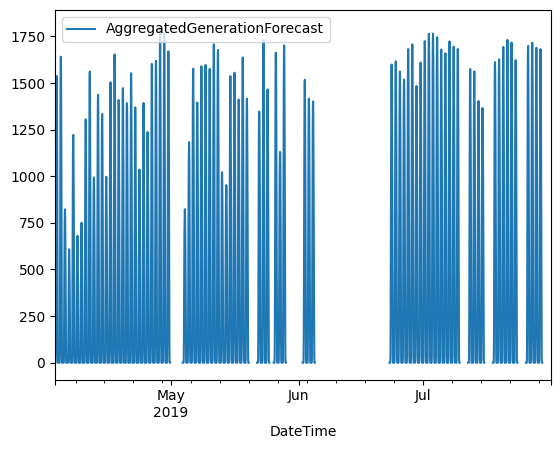

In [9]:

missing_solar=missing_daily_values(df_solar)
test=missing_solar[missing_solar[0]==24].add(
  missing_solar[missing_solar[0]==24].shift(1,freq='d'),fill_value=0).add(
    missing_solar[missing_solar[0]==24].shift(-1,freq='d'),fill_value=0)
# test[(test[0]==48 )|(test[0]==72 )].plot()
s=test[test[0]==48].index.to_series()

ttttt=pd.DataFrame({'from':s[::2].index,'to':s[1::2].index})
diff= ttttt['to']-ttttt['from']
ttttt['t']=diff
print(ttttt)
solar_missing=contiguous_hours(missing_hours_series(df_solar))
print(solar_missing)
temp=df_solar.resample(rule='h').max()
# missing_solar.plot(kind='barh',figsize=[10,15])
# print((temp[temp.columns[-1]]))
temp=temp.shift()
temp['2019-04-03':'2019-07'].plot()

# df_solar.resample(rule='d').sum()[test.index.min():test.index.max()].join(test*200)
# temp.resample(rule='d').sum()[test.index.min():test.index.max()].join(test*200)

# missing_hours.shift(freq='d')
# addPreviousDay=missing_hours.shift(freq='d').add(missing_hours,fill_value=0)
# test= addPreviousDay#[addPreviousDay[0] == 48]
# test.groupby([0]).cumcount().to_frame().join(addPreviousDay,rsuffix='t')

### Wind

Μετά το πρώτο στοιχείο, τα ελλειπή δεδομένα είναι ίδια για; True


<Axes: ylabel='From'>

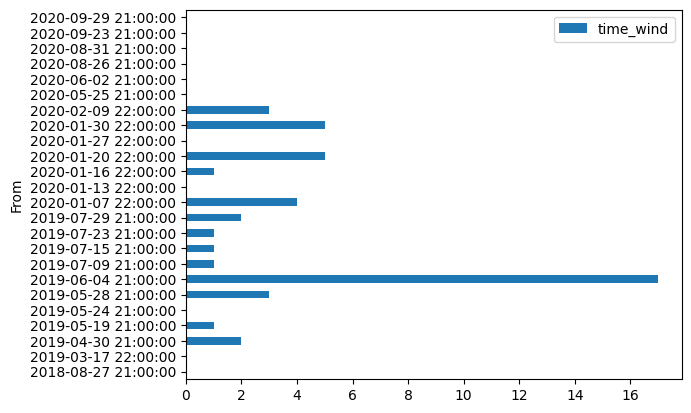

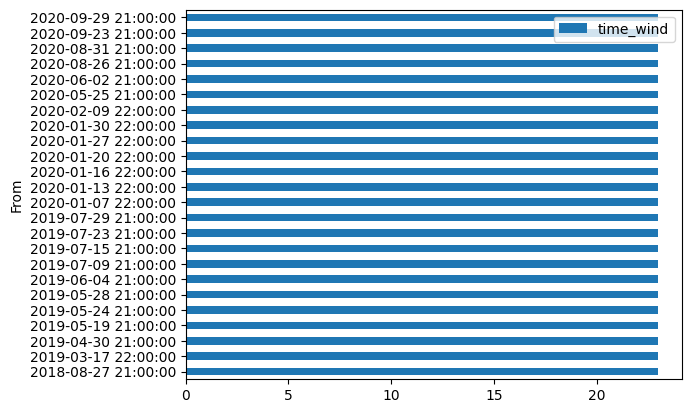

In [ ]:
df_wind=pd.read_csv('stratos_data/entsoe_stratos_wind_forecast.csv',delimiter=',',parse_dates=['DateTime'],index_col=['DateTime'])
# missing_daily_values(df_wind).plot(kind='barh',figsize=[10,15])
missing_wind=missing_daily_values(df_wind)

test=missing_wind[missing_wind[0]==24].add(
  missing_wind[missing_wind[0]==24].shift(1,freq='d'),fill_value=0).add(
    missing_wind[missing_wind[0]==24].shift(-1,freq='d'),fill_value=0)
# test[(test[0]==48 )|(test[0]==72 )].plot()
s=test[test[0]==48].index.to_series()

ttttt=pd.DataFrame({'from':s[::2].index,'to':s[1::2].index})
diff= ttttt['to']-ttttt['from']
ttttt['t']=diff
# print(ttttt)
wind_missing=contiguous_hours(missing_hours_series(df_wind))
# print(wind_missing.merge(solar_missing,suffixes=("x", "y"),on='From'))

# print(solar_missing['time'])

import datetime as dt


join_missing=wind_missing.merge(solar_missing,suffixes=("_wind", "_solar"),on='From',how='outer')
# print(join_missing.drop(columns=['To_wind','To_solar'])['time_wind'].dt.days)
# print(join_missing.drop(columns=['To_wind','To_solar'])['time_solar'].dt.days)
# print(join_missing.drop(columns=['To_wind','To_solar']))
print('Μετά το πρώτο στοιχείο, τα ελλειπή δεδομένα είναι ίδια για;',join_missing[1:]['time_wind'].equals(join_missing[1:]['time_solar']))
join_missing=join_missing.set_index('From',verify_integrity=True)
join_missing.drop(columns=['To_wind','To_solar','time_wind'])

pd.DataFrame(join_missing['time_wind'].dt.days,index=join_missing.index).plot(kind='barh')
pd.DataFrame(join_missing['time_wind'].dt.seconds/3600 +join_missing['time_wind'].dt.seconds/3600,index=join_missing.index).plot(kind='barh')

### Total load

In [11]:
df_load=pd.read_csv('stratos_data/entsoe_stratos_total_load_forecast.csv',delimiter=',',parse_dates=['DateTime'],index_col=['DateTime'])
z=missing_daily_values(df_load)
z ## no df / no missing values

,0
